# TP 2 Descente du Gradient
Dans ce TP, nous aimerions prédire le bénéfice d'une entreprise dans plusieurs ville en nous basant sur les habitant de cette ville.

Pour ce faire, nous étudierons un ensemble de données avec le bénéfice (y) et les caractéristiques des habitants (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp
import pandas as pd
import time
from sklearn.linear_model import SGDRegressor

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('data.csv', delimiter=',')  #Lecture des données à partir d'un fichier CSV
data.shape     #La méthode shape est utilisée pour obtenir les dimensions d'un tableau NumPy
df = pd.read_csv('data.csv')  #Analyse des données avec Pandas
print(df.head())   #Affiche les cinq premières lignes du DataFrame df à l'aide de la méthode head()

   6.1101   17.592
0  5.5277   9.1302
1  8.5186  13.6620
2  7.0032  11.8540
3  5.8598   6.8233
4  8.3829  11.8860


Dans ces données (data), la première colonne represente la première caractéristique (la population d'une ville x1000), la deuxieme colonne represente le bénéfice (x1000).

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0]))
print (X.shape)
y = data[:, 1]
print(y)

(97, 2)
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  3.0825  22.638   13.501    7.0467  14.692   24.147   -1.22     5.9966
 12.134    1.8495   6.5426   4.5623   4.1164   3.3928  10.117    5.4974
  0.55657  3.9115   5.3854   2.4406   6.7318   1.0463   5.1337   1.844
  8.0043   1.0179   6.7504   1.8396   4.2885   4.9981   1.4233  -1.4211
  2.4756   4.6042   3.9624   5.4141   5.1694  -0.74279 17.929   12.054
 17.054    4.8852   5.7442   7.7754   1.0173  20.992    6.6799   4.0259
  1.2784   3.3411  -2.6807   0.29678  3.8845   5.7014   6.7526   2.0576
  0.47953  0.20421  0.67861  7.5435   5.3436   4.2415   6.7981   0.92695
  0.152    2.8214   1.8451   4.2959   7.2029   1.9869   0.14454  9.0551
  0.61705]


Text(0, 0.5, 'Bénéfice x1000')

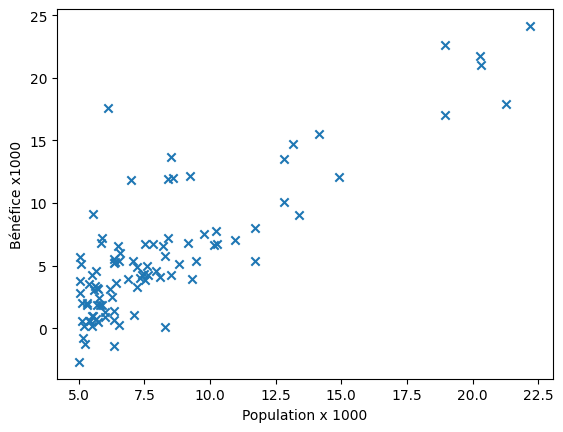

In [ ]:
# traçons ces données pour visualisation
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

# Descente du Gradient : Préparation des fonctions

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

J(θ
0
​
 ,θ
1
​
 )=
1
/
2m
​
 ∑
i=1
m
​
 (h
θ
​
 (x
(i)
 )−y
(i)
 )
2

In [ ]:
def computeCostNonVect(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    j=0
    m = X.shape[0]  #obtenir le nombre de lignes de la matrice X, ce qui correspond au nombre d'échantillons dans l'ensemble de données.
    for i in range(m): #Boucle sur chaque échantillon dans l'ensemble de données
      #print('valeur réele de y '+str(y[i])+" valeur prédite "+str(theta[1][0] * X[i][1] + theta[0][0] * X[i][0]))
      #print("j="+str(j))
      j += pow((theta[1][0] * X[i][1] + theta[0][0] * X[i][0]) - y[i] ,2)  #la somme des difference entre la valeur predite et la valeur reel
    j /= (2*m)  #la moyenne du cout
    return j
    # calculer le coût avec et sans vectorisation,
    # comparer le temps de traitement

In [ ]:
def computeCost(X, y, theta):
    # idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    predictions = np.matmul(X,theta)  #Calcul des prédictions autrement theta[1][0] * X[i][1] + theta[0][0] * X[i][0]
    y_reorganized = np.reshape(y, predictions.shape) # réorganise le vecteur de valeurs réelles y pour qu'il ait la même forme que le vecteur de prédictions
    predictions = predictions - y_reorganized  #Calcul de la différence entre les prédictions et les valeurs réelles
    cost = np.sum(predictions ** 2) / (2*X.shape[0]) #Calcul du coût moyen
    # calculer le coût avec et sans vectorisation,
    # comparer le temps de traitement
    return cost


2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
def est_proche_de_zero(nombre, tolérance=0.001):
    return abs(nombre) <= tolérance     #utilisée pour vérifier si la mise à jour des paramètres a convergé vers une solution proche de zéro, ce qui indique une convergence vers un minimum local ou global de la fonction de coût.


In [ ]:
def tracer_graphe(theta0_values, theta1_values, cost_values): #crée un graphique 3D pour visualiser le coût (ou l'erreur) d'un modèle de régression linéaire en fonction de deux paramètres : theta0 et theta1
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(theta0_values, theta1_values, cost_values, c='b', marker='o')
    ax.set_xlabel('Theta0')
    ax.set_ylabel('Theta1')
    ax.set_zlabel('Coût')
    ax.set_title('Nuage de points 3D du coût en fonction de theta0 et theta1')
    plt.show()
    #, les données sont représentées par des points individuels, chaque point représentant une combinaison de valeurs de theta0, theta1 et de coût. Cela crée un nuage de points 3D où chaque point est distinct.

In [ ]:
def tracer_graphe2(theta0_values, theta1_values, cost_values):
    theta0_array = np.array(theta0_values)
    theta1_array = np.array(theta1_values)
    cost_array = np.array(cost_values)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(theta0_array, theta1_array, cost_array, cmap='coolwarm')

    ax.set_xlabel('theta0')
    ax.set_ylabel('theta1')
    ax.set_zlabel('Coût')
    plt.show()
#crée une surface tridimensionnelle en reliant les points avec une interpolation

In [ ]:

def tracer_cout_it(cost_list):
  iterations = range(1, len(cost_list) + 1)
  # Tracer le graphe du coût en fonction du nombre d'itérations
  plt.plot(iterations, cost_list, marker='o', linestyle='-')

  plt.xlabel('Nombre d\'itérations')
  plt.ylabel('Coût')

  plt.title('Évolution du coût en fonction du nombre d\'itérations')

  plt.grid(True)

  plt.show()

In [ ]:
def gradientDescent(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération
    # pour afficher le coût en fonction de theta0 et theta1
    # calcul de la dérivée de la Loss fonction
    theta0_list = []
    theta1_list = []      #initialisation des listes vides pour stocker les valeurs de theta0, theta1 et de coût à chaque itération.
    cost_list = []
    couti = computeCostNonVect(X, y, theta)
    theta0_list.append(theta[0][0])               #calculent le coût initial en utilisant la fonction computeCostNonVect, puis stockent les valeurs initiales de theta0, theta1 et de coût dans les listes appropriées
    theta1_list.append(theta[1][0])
    cost_list.append(couti)
    nb=iterations   #variable qui contient le nombre d'iterations
    while True:  #Boucle de descente de gradient
      d0=0   #Initialisation des dérivées partielles à zéro
      d1=0
      for i in range(X.shape[0]): #Boucle sur chaque exemple de l'ensemble de données

      # Calcul des dérivées partielles du coût en utilisant la formule de la dérivée de la fonction de coût
        d0 += theta[1][0] * X[i][1] + theta[0][0]  - y[i]
        d1 += (theta[1][0] * X[i][1] + theta[0][0]  - y[i])* X[i][1]

      # X.shape[0]=n

      #Après avoir accumulé les contributions de tous les exemples dans l'ensemble de données, les dérivées partielles d0 et d1 sont divisées par le nombre total d'exemples dans l'ensemble de données. Cette normalisation est
      #nécessaire pour calculer la moyenne des dérivées partielles sur tous les exemples, ce qui rend l'algorithme indépendant de la taille de l'ensemble de données.
      d0 /= X.shape[0]
      d1 /= X.shape[0]


      #Les nouvelles valeurs des paramètres theta0 et theta1 sont calculées en soustrayant le produit du taux d'apprentissage (alpha)
      #et des dérivées partielles normalisées de leurs valeurs actuelles. Ces mises à jour sont basées sur la direction dans laquelle le coût diminue le plus rapidement.
      theta0 =theta[0][0] - alpha * d0 # alpha * d0 step size
      theta1 =theta[1][0] - alpha * d1 # alpha * d1 step size

      theta[0][0] = theta0
      theta[1][0] = theta1

      #Le nouveau coût est calculé avec les paramètres mis à jour en utilisant la fonction de coût.
      #Ces lignes calculent le coût actuel à l'aide de la fonction computeCostNonVect et stockent les valeurs de theta0, theta1 et de coût dans les listes.
      coutj = computeCostNonVect(X, y, theta)
      theta0_list.append(theta[0][0])
      theta1_list.append(theta[1][0])
      cost_list.append(coutj)
      nb -= 1
      #Cette partie de la condition vérifie si le nombre maximal d'itérations spécifié (iterations) a été atteint
      #OU
      #la condition vérifie si la différence entre le coût actuel (coutj) et le coût précédent (couti)
      #est suffisamment petite pour être considérée comme proche de zéro. Cela indique que l'algorithme a convergé vers une solution stable
      if nb ==0 or est_proche_de_zero(abs(couti - coutj)): # la convergence est à vérifier
        break
      else:
        couti=coutj # le préparer pour la prochaine itération

    #Impression et visualisation des résultats
    print(theta0_list)
    print(theta1_list)
    print(cost_list)
    tracer_graphe2(theta0_list, theta1_list, cost_list)
    tracer_cout_it(cost_list)
    return theta



In [ ]:
def gradientDescentVect(X, y, theta, alpha, iterations):  #descente du gradient en utilisant les fonction predefinies
    # garder aussi le cout à chaque itération
    # pour afficher le coût en fonction de theta0 et theta1
    # calcul de la dérivée de la Loss fonction
    theta0_list = []
    theta1_list = []
    cost_list = []
    couti = computeCost(X, y, theta)
    theta0_list.append(theta[0][0])
    theta1_list.append(theta[1][0])
    cost_list.append(couti)
    nb=iterations
    while True:
      d0=0
      d1=0
      for i in range(X.shape[0]):
        d0 += theta[1][0] * X[i][1] + theta[0][0]  - y[i]
        d1 += (theta[1][0] * X[i][1] + theta[0][0]  - y[i])* X[i][1]

      # X.shape[0]=n
      d0 /= X.shape[0]
      d1 /= X.shape[0]
      theta0 =theta[0][0] - alpha * d0 # alpha * d0 step size
      theta1 =theta[1][0] - alpha * d1 # alpha * d1 step size

      theta[0][0] = theta0
      theta[1][0] = theta1
      coutj = computeCost(X, y, theta)
      theta0_list.append(theta[0][0])
      theta1_list.append(theta[1][0])
      cost_list.append(coutj)
      nb -= 1
      if nb ==0 or est_proche_de_zero(abs(couti - coutj)): # la convergence est à vérifier
        break
      else:
        couti=coutj # le préparer pour la prochaine itération

    print(theta0_list)
    print(theta1_list)
    print(cost_list)
    tracer_graphe2(theta0_list, theta1_list, cost_list)
    tracer_cout_it(cost_list)
    return theta

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [ ]:
theta = np.zeros((2, 1))
theta[0][0]=0
theta[1][0]=0

Calculer le cout initial

In [ ]:
initialCost=computeCost(X, y, theta)
print("numpy "+str(initialCost))
initialCost2=computeCostNonVect(X, y, theta)
print("implementee "+str(initialCost2))

numpy 32.072733877455676
implementee 32.072733877455654


Appel des la fonction de calcul du gradient

[0.0, 0.0583913505154639, 0.06289175271039381, 0.05782292746142809, 0.051063625160778114, 0.04401437836500257, 0.036924131142162586, 0.029837117577144807, 0.022761181894038814, 0.015697699574200114, 0.00864689622891351, 0.0016087930989843414, -0.005416624870320671, -0.012429379151800795, -0.01942949232526835, -0.02641698713350015, -0.03339188631448144, -0.0403542125716459, -0.04730398856864609, -0.05424123692848459, -0.06116598023341998, -0.06807824102501057, -0.07497804180418254, -0.08186540503130213, -0.08874035312624871, -0.09560290846848765, -0.1024530933971432, -0.10929093021107118, -0.11611644116893162, -0.12292964848926113, -0.12973057435054533, -0.13651924089129097, -0.14329567021009804, -0.15005988436573164, -0.15681190537719392, -0.16355175522379553, -0.17027945584522744, -0.17699502914163218, -0.18369849697367516, -0.19038988116261582, -0.19706920349037876, -0.20373648569962452, -0.21039174949382045, -0.21703501653731125, -0.22366630845538965, -0.23028564683436667, -0.236893

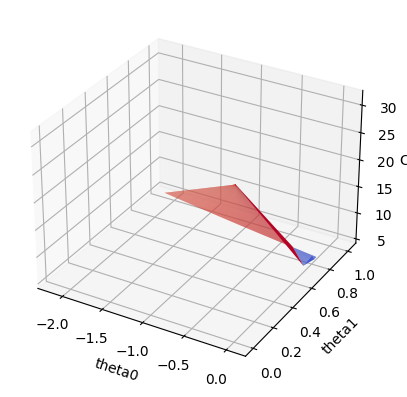

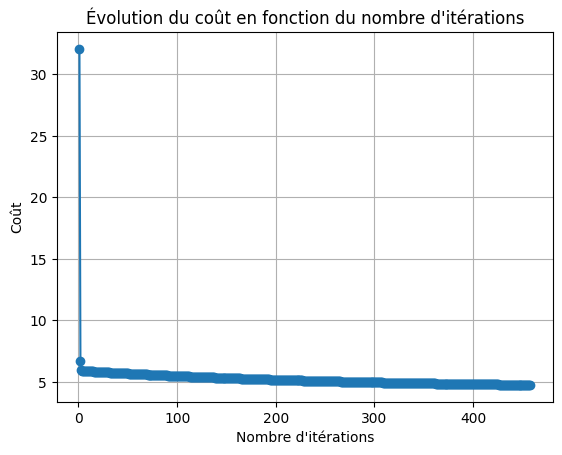

[0.0, 0.0583913505154639, 0.06289175271039381, 0.05782292746142809, 0.051063625160778114, 0.04401437836500257, 0.036924131142162586, 0.029837117577144807, 0.022761181894038814, 0.015697699574200114, 0.00864689622891351, 0.0016087930989843414, -0.005416624870320671, -0.012429379151800795, -0.01942949232526835, -0.02641698713350015, -0.03339188631448144, -0.0403542125716459, -0.04730398856864609, -0.05424123692848459, -0.06116598023341998, -0.06807824102501057, -0.07497804180418254, -0.08186540503130213, -0.08874035312624871, -0.09560290846848765, -0.1024530933971432, -0.10929093021107118, -0.11611644116893162, -0.12292964848926113, -0.12973057435054533, -0.13651924089129097, -0.14329567021009804, -0.15005988436573164, -0.15681190537719392, -0.16355175522379553, -0.17027945584522744, -0.17699502914163218, -0.18369849697367516, -0.19038988116261582, -0.19706920349037876, -0.20373648569962452, -0.21039174949382045, -0.21703501653731125, -0.22366630845538965, -0.23028564683436667, -0.236893

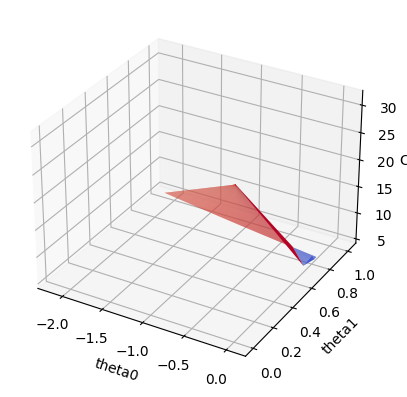

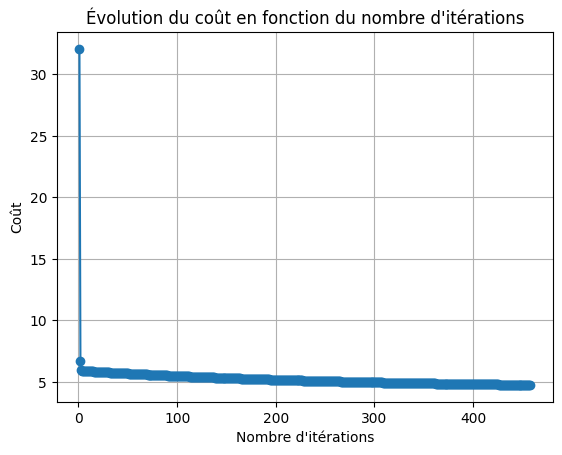

[[-2.15275293]
 [ 1.01792758]]
[[-2.15275293]
 [ 1.01792758]]
Temps d'exécution pour la descente du gardient sans vectorisation: 0.8514328002929688 secondes
Temps d'exécution pour la descente du gardient avec vectorisation: 1.0003793239593506 secondes


In [ ]:
# paramètres
iterations = 1500   #nombre d'iteration de la descente du gradient
alpha = 0.01        # le taux d'apprentissage
# Appel
start_time = time.time()

theta = gradientDescent(X, y, theta, alpha, iterations)  #running the function we defined

end_time = time.time()

temps_execution1 = end_time - start_time

theta2 = np.zeros((2, 1))
theta2[0][0]=0
theta2[1][0]=0

start_time = time.time()

theta2 = gradientDescentVect(X, y, theta2, alpha, iterations)

end_time = time.time()

temps_execution2 = end_time - start_time
print(theta)
print(theta2)
print("Temps d'exécution pour la descente du gardient sans vectorisation: "+str(temps_execution1)+" secondes")
print("Temps d'exécution pour la descente du gardient avec vectorisation: "+str(temps_execution2)+" secondes")


In [ ]:
def train_and_get_cost(X, y, alpha, max_iter):
    model = SGDRegressor(alpha=alpha, max_iter=max_iter)
    costs = []
    theta0_values = []  # List to store theta0 values
    theta1_values = []  # List to store theta1 values

    # Train the model and store costs, theta0 and theta1
    for epoch in range(max_iter):
        model.partial_fit(X, y)
        y_pred = model.predict(X)
        cost = np.sum((y_pred - y) ** 2) / (2 * X.shape[0])
        costs.append(cost)
        theta0_values.append(model.intercept_[0])
        theta1_values.append(model.coef_[0])

    model_theta = [model.intercept_[0], model.coef_[0]]
    return model_theta, costs, theta0_values, theta1_values


In [ ]:
model_theta, cost_history, theta0_values, theta1_values = train_and_get_cost(X, y, alpha, 1500)
print(model_theta)
print(cost_history)

[-2.6488786594101033, -1.1790546338833325]
[7.208659117756597, 6.179961241765355, 6.01881780074332, 5.3160641090648015, 5.824005771727371, 5.032864831246132, 6.485011339184013, 5.583158775078273, 5.168774376131588, 4.919059947476875, 5.236174906082099, 5.387751120637929, 4.794347893342849, 4.958943660475532, 5.040391963163746, 4.664729190669361, 4.639422662112992, 4.745316316777716, 7.1524856506503856, 4.698244137608265, 4.800346749012926, 4.574355997492871, 4.6022011408681225, 4.749467338314386, 4.997345868866494, 5.25837610016411, 4.536883600759622, 4.757956012180003, 4.625186142259847, 4.52419537665432, 4.551221871391641, 4.8569707564338875, 4.529217232121949, 4.520943703630248, 4.526185356817079, 4.615355315092486, 4.52053031969622, 4.507628841785929, 5.0346608840242935, 4.495696917344175, 4.498700304630362, 4.548957981588851, 4.691487828281611, 4.545019585506706, 4.845213894935465, 4.784694717874193, 4.604572424693998, 4.738668058115353, 4.500394012048784, 4.4878115525514914, 4.99

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

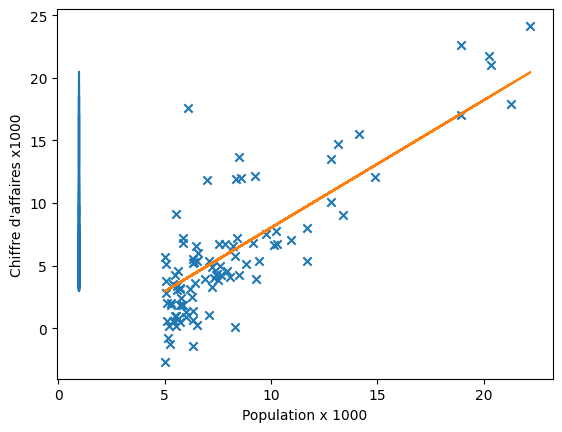

In [ ]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)
# la ligne du graphe represente le traçage de la fonction hypothèse
# la ligne devrait se rapprocher des données après entrainement avec la descente du gredient

Traçage du coût en fonction de theta0 et theta1

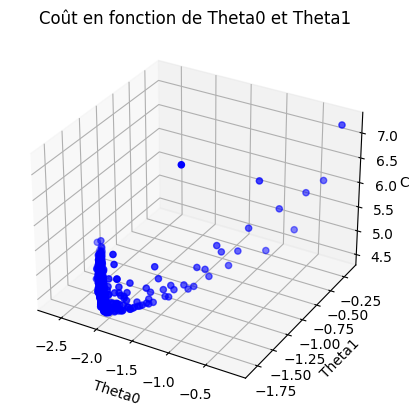

In [ ]:
def tracer_graphe3D(theta0_values, theta1_values, cost_values):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(theta0_values, theta1_values, cost_values, c='b', marker='o')
    ax.set_xlabel('Theta0')
    ax.set_ylabel('Theta1')
    ax.set_zlabel('Coût')
    ax.set_title('Coût en fonction de Theta0 et Theta1')
    plt.show()

# Appel de la fonction pour tracer le graphique 3D
tracer_graphe3D(theta0_values, theta1_values, cost_history)

Prédire des valeurs de y

In [ ]:
# Predire pour une population = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],theta)
predict1

array([1.4099936])

In [ ]:
predict2 = np.matmul([1, 7],theta)
predict2

array([4.97274013])

# Régression linéaire à plusieurs variables

Proposer, l'aide des fonctions définies precedemment, une regression linéaire lorsque le nombre de descripeurs est supérieur à 1, en utilisant la base d'apprentissage suivante

In [ ]:
# données
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',')
dataMulti.shape
df = pd.read_csv('dataMulti.csv')
print(df.head())

   2104  3  3.999e+05
0  1600  3   329900.0
1  2400  3   369000.0
2  1416  2   232000.0
3  3000  4   539900.0
4  1985  4   299900.0


Pour cette ensemble de données, nous voudrions prédire le prix d'une maison (3ème colonne de dataMulti) à partir de :
- sa supérficie (1ère colonne)
- son nombre de chambres (2ème colonne)

In [ ]:
# d'abord créer X et y
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((dataMulti.shape[0],1))
X=np.column_stack((intercept,dataMulti[:,0]))
X=np.column_stack((X,dataMulti[:,1]))
print (X.shape)
y = dataMulti[:, 2]
print(y)

(47, 3)
[399900. 329900. 369000. 232000. 539900. 299900. 314900. 199000. 212000.
 242500. 240000. 347000. 330000. 699900. 259900. 449900. 299900. 199900.
 500000. 599000. 252900. 255000. 242900. 259900. 573900. 249900. 464500.
 469000. 475000. 299900. 349900. 169900. 314900. 579900. 285900. 249900.
 229900. 345000. 549000. 287000. 368500. 329900. 314000. 299000. 179900.
 299900. 239500.]


In [ ]:
def computeCostNonVectMulti(X, y, theta):
    j=0
    m = X.shape[0]
    for i in range(m):
      #print('valeur réele de y '+str(y[i])+" valeur prédite "+str(X[i][0] * theta[0][0]  + X[i][1] * theta[1][0] + X[i][2]  * theta[2][0]))
      j += pow(X[i][0] * theta[0][0]  + X[i][1] * theta[1][0] + X[i][2]  * theta[2][0] - y[i],2)
    j /= (2*m)
    return j

Mise à l'échelle des données

In [ ]:
def mise_a_echelle(X):
  #ramener les valeurs de toutes les caract ́eristiques dans l’intervalle [0, 1]
  #en divisant chaque xij par le maximum de sa colonne.
  max_list = []
  for j in range(X.shape[1]):
    max_list.append(np.max(X[:, j]))
  #print(max_list)

  for i in range(X.shape[0]):
    for j in range(X.shape[1]):
      X[i][j]=X[i][j] / max_list[j]
  return X

Normalisation des données en moyenne = 0

In [ ]:
def normalisation(X):
    #Remplacer chaque xij par xij−μ1 / max−min
    max_list = []
    min_list = []
    moy_list = []  #μ1

    # Calcul des maximums, minimums et moyennes pour chaque colonne
    for j in range(X.shape[1]):
        max_list.append(np.max(X[:, j]))
        min_list.append(np.min(X[:, j]))
        moy_list.append(np.mean(X[:, j]))
    #print(max_list)
    #print(min_list)
    #print(moy_list)

    # Normalisation des données
    for j in range(X.shape[1]):
        diff = max_list[j] - min_list[j]
        if diff == 0:
            continue  # éviter la division par zéro
        X[:, j] = (X[:, j] - moy_list[j]) / diff

    return X

In [ ]:
def tracer_graphe2(theta0_values, theta1_values, theta2_values, cost_values):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    print(cost_values)
    couleurs = ['red' if cost > 10000000000 else 'green' for cost in cost_values]
    ax.scatter(theta0_values, theta1_values, theta2_values, c=couleurs, cmap='viridis', marker='o')
    ax.set_xlabel('Theta0')
    ax.set_ylabel('Theta1')
    ax.set_zlabel('Theta2')
    ax.set_title('Nuage de points 3D du coût en fonction de theta0, theta1 et theta2')
    plt.show()


Appliquer la descente du gradient à plusieurs variables

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, iterations):
    # garder aussi le cout à chaque itération
    # pour afficher le coût en fonction de theta0 et theta1
    # calcul de la dérivée de la Loss fonction
    theta0_list = []
    theta1_list = []
    theta2_list = []
    cost_list = []
    couti = computeCost(X, y, theta)
    theta0_list.append(theta[0][0])
    theta1_list.append(theta[1][0])
    theta2_list.append(theta[2][0])
    cost_list.append(couti)
    nb=iterations
    while True:
      d = np.zeros((X.shape[1], 1)) # pour chaque paramètre calculer la somme des dérivées
      for i in range(X.shape[0]):
        #d[0] += (theta[0][0] * X[i][0] + theta[1][0] * X[i][1] +theta[2][0] * X[i][2] - y[i] ) * X[i][0]
        #d[1] += (theta[0][0] * X[i][0] + theta[1][0] * X[i][1] +theta[2][0] * X[i][2] - y[i] )* X[i][1]
        #d[2] += (theta[0][0] * X[i][0] + theta[1][0] * X[i][1] +theta[2][0] * X[i][2] - y[i] )* X[i][2]
        d[0] +=  (np.sum(np.dot(X[i, :],theta)) - y[i] )* X[i][0]
        d[1] +=  (np.sum(np.dot(X[i, :],theta)) - y[i] )* X[i][1]
        d[2] +=  (np.sum(np.dot(X[i, :],theta)) - y[i] )* X[i][2]
      #for j in range(X.shape[1]):
        #for i in range(X.shape[0]):
          #d[j] += (np.dot(theta[:, 0], X[i]) - y[i]) * X[i][j]




      # X.shape[0]=n
      #print(d)
      d /= X.shape[0]
      #print("shape of x"+ str(X.shape[0]))
      #print(d)
      theta_prime_list = []
      for j in range (theta.shape[0]):
        theta_prime_list.append(theta[j][0]  - alpha * d[j][0])

      for j in range (theta.shape[0]):
         theta[j][0] = theta_prime_list[j]

      coutj = computeCost(X, y, theta)
      theta0_list.append(theta[0][0])
      theta1_list.append(theta[1][0])
      theta2_list.append(theta[2][0])
      cost_list.append(coutj)
      nb -= 1
      if nb ==0 or est_proche_de_zero( abs(couti - coutj)): # la convergence est à vérifier : quand le pas devient trop petit
        break
      else:
        couti=coutj # le préparer pour la prochaine itération
    tracer_graphe2(theta0_list, theta1_list,theta2_list ,cost_list)
    tracer_cout_it(cost_list)
    return theta

Comparer la descente du gradient avec et sans normalisation
- **Exemple**: voir la difference dans le temps de calcul

[[ 1.00000000e+00  2.84939738e-02 -4.25531915e-02]
 [ 1.00000000e+00 -1.10502165e-01 -4.25531915e-02]
 [ 1.00000000e+00  1.10126627e-01 -4.25531915e-02]
 [ 1.00000000e+00 -1.61246787e-01 -2.92553191e-01]
 [ 1.00000000e+00  2.75598221e-01  2.07446809e-01]
 [ 1.00000000e+00 -4.32455904e-03  2.07446809e-01]
 [ 1.00000000e+00 -1.28704041e-01 -4.25531915e-02]
 [ 1.00000000e+00 -1.58213141e-01 -4.25531915e-02]
 [ 1.00000000e+00 -1.71175083e-01 -4.25531915e-02]
 [ 1.00000000e+00 -1.39735480e-01 -4.25531915e-02]
 [ 1.00000000e+00 -1.67349286e-02  2.07446809e-01]
 [ 1.00000000e+00 -1.87769185e-04 -4.25531915e-02]
 [ 1.00000000e+00 -3.05242281e-02 -4.25531915e-02]
 [ 1.00000000e+00  6.83209914e-01  4.57446809e-01]
 [ 1.00000000e+00 -2.02063114e-01 -4.25531915e-02]
 [ 1.00000000e+00  8.25480278e-02  2.07446809e-01]
 [ 1.00000000e+00 -1.87722242e-01 -2.92553191e-01]
 [ 1.00000000e+00 -2.10888266e-01 -4.25531915e-02]
 [ 1.00000000e+00  1.67765899e-01  2.07446809e-01]
 [ 1.00000000e+00  2.84147587e-

<ipython-input-27-2298516d5e11>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(theta0_values, theta1_values, theta2_values, c=couleurs, cmap='viridis', marker='o')


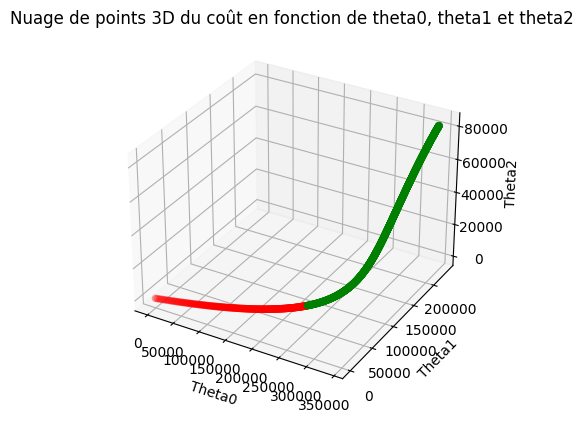

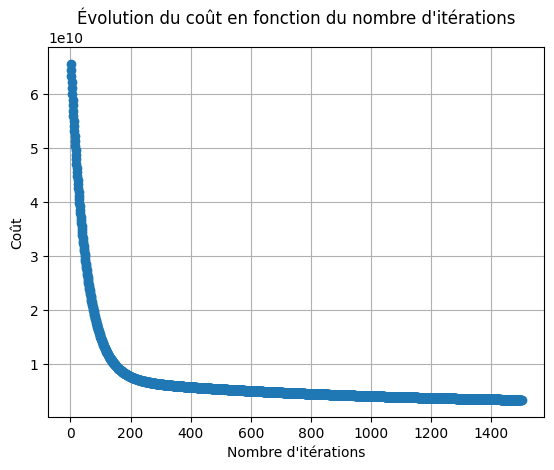

[65591562812.53426, 64432231248.04075, 63295852520.549835, 62181970014.75144, 61090136201.79314, 60019912458.459785, 58970868889.95186, 57942584156.18986, 56934645301.575966, 55946647588.1429, 54978194332.02333, 54028896743.1736, 53098373768.28674, 52186251936.83183, 51292165210.15686, 50415754833.59462, 49556669191.51164, 48714563665.241646, 47889100493.84615, 47079948637.64594, 46286783644.46821, 45509287518.55546, 44747148592.082985, 44000061399.23338, 43267726552.776764, 42549850623.10704, 41846146019.68557, 41156330874.84387, 40480128929.89873, 39817269423.53371, 39167486982.40166, 38530521513.9045, 37906118101.10645, 37294026899.73862, 36694003037.253136, 36105806513.88618, 35529202105.68979, 34963959269.493324, 34409852049.75632, 33866658987.274746, 33334163029.70427, 32812151443.8639, 32300415729.784885, 31798751536.470028, 31306958579.3294, 30824840559.258987, 30352205083.329865, 29888863587.055458, 29434631258.20578, 28989326962.13778, 28552773168.61157, 28124795880.06306, 27

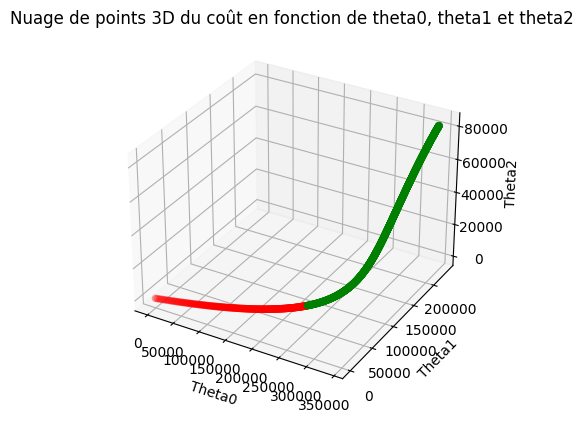

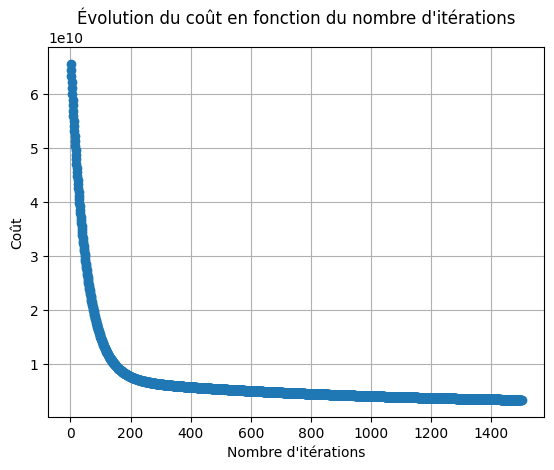

[[340412.66939734]
 [233166.8400439 ]
 [ 81960.69060103]]
[[340412.66939734]
 [233166.8400439 ]
 [ 81960.69060103]]
Temps d'exécution pour la descente du gardient sans  normalisation: 3.0477840900421143 secondes
Temps d'exécution pour la descente du gardient avec normalisation: 3.0168251991271973 secondes


In [ ]:
# paramètres
iterations = 1500
alpha = 0.01
theta = np.zeros((3, 1))
theta[0][0]=0
theta[1][0]=1
theta[2][0]=0

theta1 = np.zeros((3, 1))
theta1[0][0]=0
theta1[1][0]=1
theta1[2][0]=0


x_mis_a_echelle=mise_a_echelle(X)
X_normalise = normalisation(x_mis_a_echelle)

print(X_normalise)

initialCost=computeCostNonVectMulti(X_normalise, y, theta)
print(initialCost)
initialCost=computeCost(X_normalise, y, theta)
print(initialCost)

# Appel sans normalisation
start_time = time.time()
theta = gradientDescentMulti(X, y, theta, alpha, iterations)
end_time = time.time()
temps_execution1 = end_time - start_time

# Appel avec normalisation
start_time = time.time()
theta1 = gradientDescentMulti(X_normalise, y, theta1, alpha, iterations)
end_time = time.time()
temps_execution2 = end_time - start_time

print(theta)
print(theta1)
print("Temps d'exécution pour la descente du gardient sans  normalisation: "+str(temps_execution1)+" secondes")
print("Temps d'exécution pour la descente du gardient avec normalisation: "+str(temps_execution2)+" secondes")



# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
def train_and_get_cost(X, y, alpha, max_iter):
  model = SGDRegressor(alpha=alpha, max_iter=max_iter)
  costs = []  # List to store costs after each epoch

  # Train the model and store costs
  for epoch in range(max_iter):
    model.partial_fit(X, y)  # Update model weights for each epoch
    y_pred = model.predict(X)
    cost = np.sum((y_pred - y) ** 2) / (2 * X.shape[0])
    costs.append(cost)

  model_theta = [model.intercept_[0], model.coef_[0],model.coef_[1]]
  return model_theta, costs


[212113.68318917105, 127640.77005604334, 359858.71675883763]
[29883229205.173508, 19082196809.05903, 13931077485.261635, 11160683039.927519, 9579368654.58237, 8624361832.52523, 8021195942.025914, 7613781447.169067, 7337507366.9282255, 7141147142.635013, 6995330091.767998, 6883443643.947993, 6795300121.394054, 6721571231.058573, 6656081856.188718, 6598207670.751587, 6544273690.891362, 6495421541.97743, 6450421030.042701, 6407203105.889029, 6366025917.079329, 6325869147.216693, 6287835237.014982, 6249686209.5436735, 6213045603.2026005, 6177187526.787694, 6142173841.534903, 6108101881.382982, 6074897208.063964, 6042289736.904674, 6010169820.778392, 5978589592.974943, 5947958521.581791, 5917917416.769756, 5888088917.295603, 5858855528.52906, 5830149351.5428915, 5801808687.348018, 5773947893.020792, 5746791544.848874, 5719740662.4825325, 5693146647.370589, 5666985618.377277, 5641250306.448183, 5615633684.986144, 5590567735.805651, 5565873080.7844, 5541550410.224194, 5517538048.271214, 54939

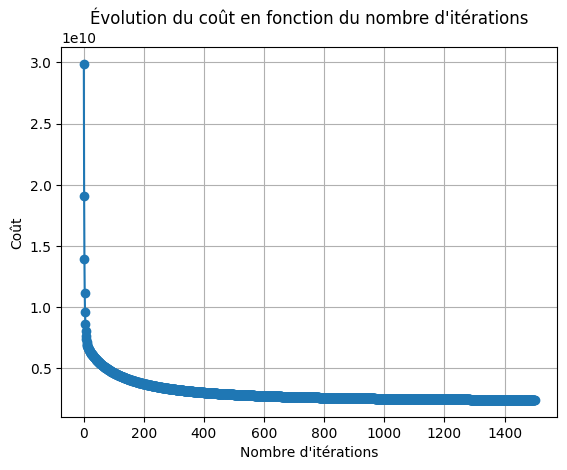

In [ ]:
model_theta, cost_history = train_and_get_cost(X, y, alpha, 1500)
print(model_theta)
print(cost_history)
tracer_cout_it(cost_history)

# Consignes

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

In [ ]:
1. #Taux d'apprentissage adaptatif : Utilisez des techniques telles que l'adaptation du taux d'apprentissage en fonction de la performance du modèle
# l'utilisation d'algorithmes d'optimisation avancés comme Adam peuvent aider à ajuster dynamiquement le taux d'apprentissage pendant l'entraînement.
2. #Augmentation des données : techniques d'augmentation des données pour générer des exemples supplémentaires à partir des données d'entraînement existantes, ce qui peut aider à améliorer la généralisation du modèle.
3. #Optimisation des hyperparamètres : Utilisez des techniques d'optimisation des hyperparamètres telles que la recherche par grille, la recherche aléatoire ou l'optimisation bayésienne pour trouver les meilleures valeurs des hyperparamètres du modèle